In [18]:
%matplotlib notebook

In [19]:
#Datasource: Crime Incidents in 2019 - Washington DC
#URL: http://opendata.dc.gov/datasets/crime-incidents-in-2019/data


# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import json
import gmaps as gmaps



import random
import requests
#from googlesearch import search 


from pprint import pprint

# Google developer API key
import sys
sys.path.append('../')
from config import gkey


In [20]:
#Load Data

df = pd.read_csv("dccrime2019.csv")
df.head(2)


,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,-77.034568,38.908324,19033655,2019-02-26T17:42:03.000Z,EVENING,OTHERS,THEFT/OTHER,1320 - 1399 BLOCK OF 15TH STREET NW,397002.0,137829.0,...,005201 2,5201.0,Precinct 16,38.908316,-77.034566,NaN,2019-02-26T17:04:39.000Z,NaN,263127725,19033655-01
1,-76.989281,38.900203,19033659,2019-02-26T18:51:14.000Z,EVENING,OTHERS,THEFT/OTHER,1200 - 1299 BLOCK OF H STREET NE,400930.0,136927.0,...,008402 1,8402.0,Precinct 82,38.900195,-76.989279,NaN,2019-02-26T16:30:28.000Z,2019-02-26T16:45:54.000Z,263127726,19033659-01


In [21]:
# Collecting a list of all columns within the DataFrame
df.columns

Index(['X', 'Y', 'CCN', 'REPORT_DAT', 'SHIFT', 'METHOD', 'OFFENSE', 'BLOCK',
       'XBLOCK', 'YBLOCK', 'WARD', 'ANC', 'DISTRICT', 'PSA',
       'NEIGHBORHOOD_CLUSTER', 'BLOCK_GROUP', 'CENSUS_TRACT',
       'VOTING_PRECINCT', 'LATITUDE', 'LONGITUDE', 'BID', 'START_DATE',
       'END_DATE', 'OBJECTID', 'OCTO_RECORD_ID'],
      dtype='object')

In [23]:
# Reorganizing the columns using double brackets
crime_data = df[["OFFENSE","SHIFT","VOTING_PRECINCT","WARD","BLOCK","LATITUDE","LONGITUDE"]]
crime_data.head()

,OFFENSE,SHIFT,VOTING_PRECINCT,WARD,BLOCK,LATITUDE,LONGITUDE
0,THEFT/OTHER,EVENING,Precinct 16,2,1320 - 1399 BLOCK OF 15TH STREET NW,38.908316,-77.034566
1,THEFT/OTHER,EVENING,Precinct 82,6,1200 - 1299 BLOCK OF H STREET NE,38.900195,-76.989279
2,MOTOR VEHICLE THEFT,EVENING,Precinct 142,6,700 - 999 BLOCK OF INDEPENDENCE AVENUE SW,38.887563,-77.023963
3,THEFT F/AUTO,EVENING,Precinct 14,2,1600 - 1622 BLOCK OF 19TH STREET NW,38.911493,-77.043445
4,THEFT F/AUTO,EVENING,Precinct 6,2,1200 - 1227 BLOCK OF 33RD STREET NW,38.905528,-77.066073


In [25]:
a = crime_data["WARD"].nunique()
x = crime_data["OFFENSE"].count()
y = crime_data["VOTING_PRECINCT"].nunique()
z = crime_data["OFFENSE"].nunique()

avg = round(x/y)
avg = int(avg)

print(f"There are {x} crimes in this dataset.")
print(f"There are {z} distinct crimes in this dataset.")
print(f"There are {y} precincts in this dataset.")
print(f"There are {a} wards in this dataset.")
print(f"There is an average of {avg} crimes per precinct in this dataset.")

#print(f"The average number of crimes per precinct are {z} in this dataset")

There are 5306 crimes in this dataset.
There are 8 distinct crimes in this dataset.
There are 143 precincts in this dataset.
There are 8 wards in this dataset.
There is an average of 37 crimes per precinct in this dataset.


In [26]:
#Crime types

offense = crime_data["OFFENSE"].value_counts()
offense

THEFT/OTHER                   2161
THEFT F/AUTO                  1967
MOTOR VEHICLE THEFT            337
ROBBERY                        299
ASSAULT W/DANGEROUS WEAPON     244
BURGLARY                       239
HOMICIDE                        30
SEX ABUSE                       29
Name: OFFENSE, dtype: int64

In [28]:
#Crime Precinct

precinct = crime_data["VOTING_PRECINCT"].value_counts()

precinct.head(5)


Precinct 129    326
Precinct 17     202
Precinct 83     152
Precinct 72     127
Precinct 137    117
Name: VOTING_PRECINCT, dtype: int64

In [29]:
#Crime Ward

ward = crime_data["WARD"].value_counts()

ward.head(10)


2    1117
6     848
5     838
1     709
7     567
8     434
4     414
3     379
Name: WARD, dtype: int64

In [30]:
sexcrimes = crime_data.loc[crime_data["OFFENSE"]=="SEX ABUSE"]

sexcrimes.head(25)

,OFFENSE,SHIFT,VOTING_PRECINCT,WARD,BLOCK,LATITUDE,LONGITUDE
42,SEX ABUSE,MIDNIGHT,Precinct 68,5,3700 - 3799 BLOCK OF 12TH STREET NE,38.935346,-76.991223
252,SEX ABUSE,MIDNIGHT,Precinct 126,8,100 162 BLOCK OF JOLIET STREET SW,38.821264,-77.006345
359,SEX ABUSE,EVENING,Precinct 94,7,920 - 999 BLOCK OF 52ND STREET NE,38.903279,-76.925121
686,SEX ABUSE,EVENING,Precinct 103,7,400 - 499 BLOCK OF BURBANK STREET SE,38.883678,-76.943075
821,SEX ABUSE,EVENING,Precinct 14,2,2100 - 2119 BLOCK OF MASSACHUSETTS AVENUE NW,38.910933,-77.047181
835,SEX ABUSE,EVENING,Precinct 16,2,1400 - 1425 BLOCK OF R STREET NW,38.912604,-77.032607
905,SEX ABUSE,EVENING,Precinct 120,8,1100 - 1199 BLOCK OF ALABAMA AVENUE SE,38.844217,-76.991130
938,SEX ABUSE,EVENING,Precinct 143,2,300 - 498 BLOCK OF INDIANA AVENUE NW,38.894807,-77.017556
1028,SEX ABUSE,DAY,Precinct 3,2,800 - 899 BLOCK OF NEW HAMPSHIRE AVENUE NW,38.900130,-77.052361
1388,SEX ABUSE,EVENING,Precinct 10,3,4000 - 4299 BLOCK OF CATHEDRAL AVENUE NW,38.930282,-77.081193


In [31]:
# Collecting a list of all columns within the DataFrame
sexcrimes.columns

Index(['OFFENSE', 'SHIFT', 'VOTING_PRECINCT', 'WARD', 'BLOCK', 'LATITUDE',
       'LONGITUDE'],
      dtype='object')

In [32]:
sexcrimesprecinct = sexcrimes["VOTING_PRECINCT"].value_counts()

In [33]:
sexcrimesprecinct.head(2)

Precinct 126    3
Precinct 14     2
Name: VOTING_PRECINCT, dtype: int64

In [34]:
sexcrimesward = sexcrimes["WARD"].value_counts()

In [35]:
print(sexcrimesward)

2    6
7    5
5    5
8    4
6    4
4    2
3    2
1    1
Name: WARD, dtype: int64


In [36]:
#Ward 2 data

Ward2 = crime_data.loc[crime_data["WARD"]==2]

Ward2.head()

,OFFENSE,SHIFT,VOTING_PRECINCT,WARD,BLOCK,LATITUDE,LONGITUDE
0,THEFT/OTHER,EVENING,Precinct 16,2,1320 - 1399 BLOCK OF 15TH STREET NW,38.908316,-77.034566
3,THEFT F/AUTO,EVENING,Precinct 14,2,1600 - 1622 BLOCK OF 19TH STREET NW,38.911493,-77.043445
4,THEFT F/AUTO,EVENING,Precinct 6,2,1200 - 1227 BLOCK OF 33RD STREET NW,38.905528,-77.066073
17,THEFT/OTHER,EVENING,Precinct 129,2,1200 - 1299 BLOCK OF G STREET NW,38.898309,-77.028854
19,THEFT F/AUTO,EVENING,Precinct 5,2,3100 - 3199 BLOCK OF N STREET NW,38.906800,-77.062131


In [37]:
Ward2offense = Ward2["OFFENSE"].value_counts()
Ward2offense

THEFT/OTHER                   556
THEFT F/AUTO                  456
ROBBERY                        33
BURGLARY                       29
MOTOR VEHICLE THEFT            24
ASSAULT W/DANGEROUS WEAPON     13
SEX ABUSE                       6
Name: OFFENSE, dtype: int64

In [38]:
#Ward 3 data

Ward3 = crime_data.loc[crime_data["WARD"]==3]

Ward3.head()

,OFFENSE,SHIFT,VOTING_PRECINCT,WARD,BLOCK,LATITUDE,LONGITUDE
11,THEFT F/AUTO,EVENING,Precinct 9,3,5000 - 5099 BLOCK OF SEDGWICK STREET NW,38.939068,-77.100419
21,THEFT/OTHER,EVENING,Precinct 11,3,3700 - 3729 BLOCK OF BENTON STREET NW,38.920675,-77.074136
31,BURGLARY,EVENING,Precinct 11,3,3620 - 3699 BLOCK OF DAVIS STREET NW,38.923622,-77.072606
33,THEFT/OTHER,EVENING,Precinct 11,3,2500 - 2599 BLOCK OF 41ST STREET NW,38.923085,-77.080620
66,THEFT F/AUTO,DAY,Precinct 8,3,2800 - 2899 BLOCK OF HURST TERRACE NW,38.927231,-77.101199


In [50]:
Ward3offense = Ward3["OFFENSE"].value_counts()
Ward3offense

THEFT F/AUTO                  182
THEFT/OTHER                   139
BURGLARY                       22
MOTOR VEHICLE THEFT            21
ROBBERY                         9
ASSAULT W/DANGEROUS WEAPON      3
SEX ABUSE                       2
HOMICIDE                        1
Name: OFFENSE, dtype: int64

In [39]:
crime_data.groupby(["VOTING_PRECINCT","OFFENSE"]).size()

VOTING_PRECINCT  OFFENSE                   
Precinct 1       ASSAULT W/DANGEROUS WEAPON     2
                 MOTOR VEHICLE THEFT            2
                 ROBBERY                        1
                 THEFT F/AUTO                  26
                 THEFT/OTHER                   19
Precinct 10      MOTOR VEHICLE THEFT            1
                 SEX ABUSE                      1
                 THEFT F/AUTO                   9
                 THEFT/OTHER                    2
Precinct 100     ASSAULT W/DANGEROUS WEAPON     3
                 BURGLARY                       3
                 MOTOR VEHICLE THEFT            3
                 ROBBERY                        7
                 THEFT F/AUTO                   5
                 THEFT/OTHER                    4
Precinct 101     MOTOR VEHICLE THEFT            2
                 ROBBERY                        1
                 THEFT F/AUTO                   6
                 THEFT/OTHER                    6
Precin

In [40]:
p129 = crime_data.loc[crime_data["VOTING_PRECINCT"]=="Precinct 129"]

In [41]:
p129offense = p129["OFFENSE"].value_counts()
p129offense

THEFT/OTHER                   181
THEFT F/AUTO                  122
ROBBERY                        12
MOTOR VEHICLE THEFT             6
ASSAULT W/DANGEROUS WEAPON      3
BURGLARY                        2
Name: OFFENSE, dtype: int64

In [42]:
p129.groupby(["OFFENSE", "SHIFT"]).size()


OFFENSE                     SHIFT   
ASSAULT W/DANGEROUS WEAPON  EVENING       1
                            MIDNIGHT      2
BURGLARY                    DAY           1
                            EVENING       1
MOTOR VEHICLE THEFT         EVENING       4
                            MIDNIGHT      2
ROBBERY                     DAY           2
                            EVENING       7
                            MIDNIGHT      3
THEFT F/AUTO                DAY          39
                            EVENING      48
                            MIDNIGHT     35
THEFT/OTHER                 DAY          54
                            EVENING     102
                            MIDNIGHT     25
dtype: int64

In [43]:
#Precinct 83 is the Union Station area
p83 = crime_data.loc[crime_data["VOTING_PRECINCT"]=="Precinct 83"]

p83.groupby(["OFFENSE", "SHIFT"]).size()

OFFENSE                     SHIFT   
ASSAULT W/DANGEROUS WEAPON  EVENING      1
BURGLARY                    DAY          4
MOTOR VEHICLE THEFT         DAY          1
                            EVENING      3
ROBBERY                     DAY          2
                            EVENING      1
                            MIDNIGHT     6
THEFT F/AUTO                DAY         17
                            EVENING     13
                            MIDNIGHT     7
THEFT/OTHER                 DAY         35
                            EVENING     50
                            MIDNIGHT    12
dtype: int64

In [44]:
#Precinct 17 is the downtown area
p17 = crime_data.loc[crime_data["VOTING_PRECINCT"]=="Precinct 17"]

p17.groupby(["OFFENSE", "SHIFT"]).size()

OFFENSE                     SHIFT   
ASSAULT W/DANGEROUS WEAPON  DAY          1
                            EVENING      1
                            MIDNIGHT     1
BURGLARY                    DAY          7
MOTOR VEHICLE THEFT         DAY          1
                            MIDNIGHT     2
ROBBERY                     DAY          1
                            EVENING      2
                            MIDNIGHT     1
THEFT F/AUTO                DAY         19
                            EVENING     23
                            MIDNIGHT    20
THEFT/OTHER                 DAY         39
                            EVENING     65
                            MIDNIGHT    19
dtype: int64

In [45]:
df_sexcrime = crime_data.loc[crime_data["OFFENSE"]=="SEX ABUSE"]
df_theftother = crime_data.loc[crime_data["OFFENSE"]=="THEFT/OTHER"]
df_robbery = crime_data.loc[crime_data["OFFENSE"]=="ROBBERY"]
df_theftauto = crime_data.loc[crime_data["OFFENSE"]=="THEFT F/AUTO"]
df_burglary = crime_data.loc[crime_data["OFFENSE"]=="BURGLARY"]



In [46]:
#Wards and type of offenses
df_burglary.groupby(["WARD","OFFENSE"]).size()


WARD  OFFENSE 
1     BURGLARY    28
2     BURGLARY    29
3     BURGLARY    22
4     BURGLARY    32
5     BURGLARY    43
6     BURGLARY    20
7     BURGLARY    31
8     BURGLARY    34
dtype: int64

In [47]:
#Wards and type of offenses
crime_data.groupby(["WARD","VOTING_PRECINCT"]).size()


WARD  VOTING_PRECINCT
1     Precinct 137       116
      Precinct 20         20
      Precinct 22        102
      Precinct 23         20
      Precinct 24         19
      Precinct 25         39
      Precinct 35         38
      Precinct 36         43
      Precinct 37         83
      Precinct 38         43
      Precinct 39         86
      Precinct 40         19
      Precinct 41         39
      Precinct 42         19
      Precinct 43         23
2     Precinct 129       326
      Precinct 13         10
      Precinct 14         93
      Precinct 141        56
      Precinct 143        33
      Precinct 15         25
      Precinct 16         95
      Precinct 17        202
      Precinct 2          31
      Precinct 3          18
      Precinct 4          40
      Precinct 5         100
      Precinct 6          88
3     Precinct 10         13
      Precinct 11         36
                        ... 
7     Precinct 111        25
      Precinct 113        42
      Precinct 132   

In [48]:
# Create a group based on the values in the 'Offense' column
offense_group = crime_data.groupby('OFFENSE')

# Count how many times each offense appears in our group
count_offense = offense_group['OFFENSE'].count()

count_offense

OFFENSE
ASSAULT W/DANGEROUS WEAPON     244
BURGLARY                       239
HOMICIDE                        30
MOTOR VEHICLE THEFT            337
ROBBERY                        299
SEX ABUSE                       29
THEFT F/AUTO                  1967
THEFT/OTHER                   2161
Name: OFFENSE, dtype: int64

<IPython.core.display.Javascript object>


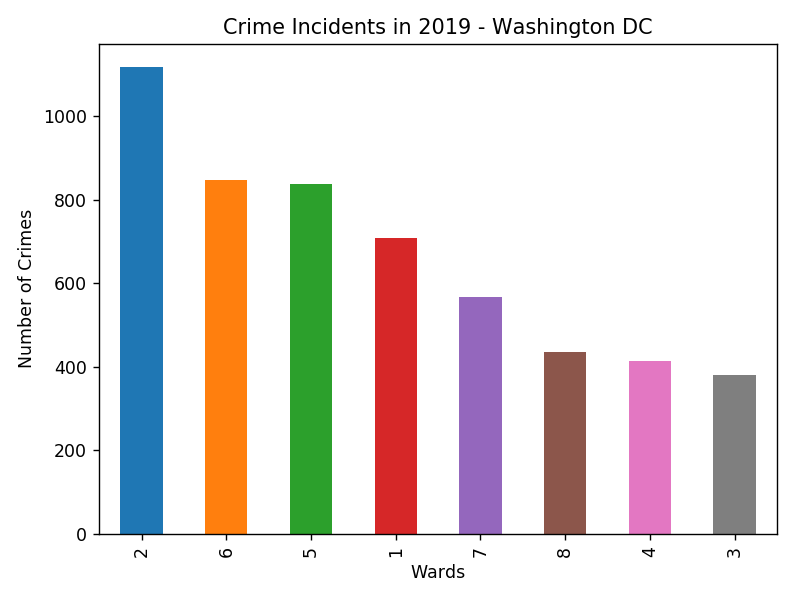

In [49]:
# Create a bar chart based off of the group series from before
count_chart = ward.plot(kind='bar')

# Set the xlabel and ylabel using class methods
plt.title("Crime Incidents in 2019 - Washington DC")
#count_chart.set_xticks([offense_group['OFFENSE'].count()])
count_chart.set_xlabel("Wards")
count_chart.set_ylabel("Number of Crimes")

   

plt.show()
plt.tight_layout()
plt.savefig("dccrime2019_wards.png")

In [30]:
# Export file as a CSV, without the Pandas index, but with the header
crime_data.to_csv("DCCrimes2019_cleaned.csv", index=False, header=True)